## ML Regression, Weather prediction


### The dataset used for this project was the weather in Szeged between 2006-2016 dataset from kaggle (link mentioned below) which explored weather variables between 2006-2016. The data includes variables such as precip type and temperature.

### The main objective in this analysis is to determine a link between precipitation type and the air conditions and using this to predict the precipitation type, this also negates the need for any categorical variables aside from the precipitation type.

### The regression models that are tested are Linear regression, Polynomial Linear Regression, Lasso regression and Polynomial Rdige regression.

##### source of data: (https://www.kaggle.com/datasets/budincsevity/szeged-weather)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
print(df["Precip Type"].unique())

['rain' 'snow' nan]


In [8]:
df.drop(["Formatted Date", "Summary", "Daily Summary", "Loud Cover"], axis= 1, inplace= True)

In [9]:
print(df[df.isnull().any(axis=1)])

      Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
52672         NaN        19.016667                 19.016667      0.26   
52674         NaN        17.850000                 17.850000      0.28   
52675         NaN        16.322222                 16.322222      0.32   
52677         NaN        12.566667                 12.566667      0.43   
52678         NaN        12.927778                 12.927778      0.47   
...           ...              ...                       ...       ...   
95584         NaN         8.322222                  7.044444      0.85   
95585         NaN         7.627778                  6.183333      0.87   
95586         NaN         7.111111                  5.511111      0.89   
95587         NaN         6.672222                  4.961111      0.90   
95588         NaN         6.322222                  4.588889      0.91   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
52672            14.8764                  

One of the issues with this dataset is that nulls are noted as both Nans and nan thus both need to be dropped as using imputation for precipitation data will reduce the accuracy of the results and prevent anomalous events from being more noticeable

In [10]:
df = df.dropna()
df = df[~df['Precip Type'].str.contains('nan')]
df.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [11]:
# data shows we still have a large number of rows that we can use to 
df.shape

(95936, 8)

In [12]:
df.dtypes

Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [13]:
print(df["Precip Type"].unique())

['rain' 'snow']


Convert categorical Precip Type to feature into numerical using the label encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df["Precip Type"].drop_duplicates())
df["Precip Type encoded"] = enc.transform(df["Precip Type"])

In [15]:
print(np.unique(df["Precip Type encoded"]))
print(df["Precip Type"].unique())

[0 1]
['rain' 'snow']


In [16]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type encoded
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.563503
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,-0.566058
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.232622
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.067771
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.042142
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.316483
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.009271
Precip Type encoded,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271,1.000000


In [17]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type encoded
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.563503
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037,-0.566058
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.232622
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.067771
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.042142
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.316483
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.009271
Precip Type encoded,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271,1.000000


In [18]:
df.corr()['Precip Type encoded'].sort_values(ascending = True)

Apparent Temperature (C)   -0.566058
Temperature (C)            -0.563503
Visibility (km)            -0.316483
Wind Speed (km/h)          -0.067771
Wind Bearing (degrees)     -0.042142
Pressure (millibars)        0.009271
Humidity                    0.232622
Precip Type encoded         1.000000
Name: Precip Type encoded, dtype: float64

(8.5, -0.5)

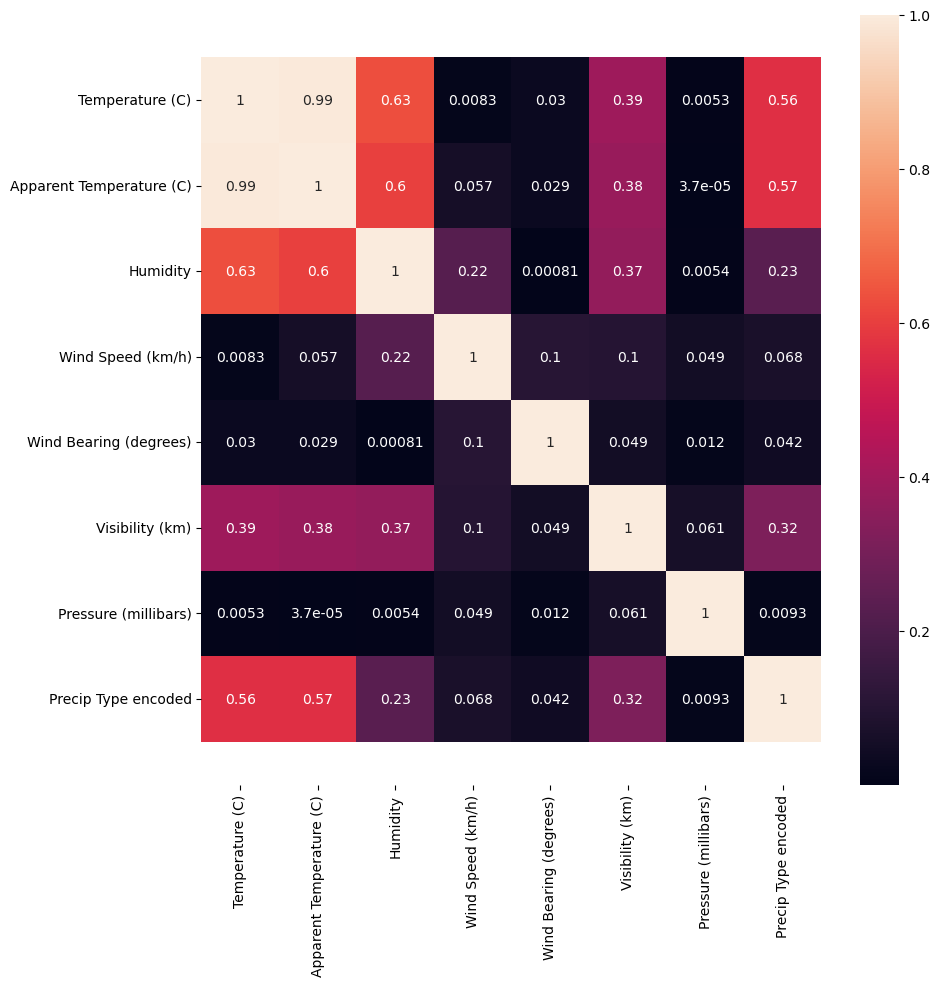

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(abs(df.corr()), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
absolute_correlation_matrix = abs(df.corr()['Precip Type encoded'])
print(absolute_correlation_matrix)

Temperature (C)             0.563503
Apparent Temperature (C)    0.566058
Humidity                    0.232622
Wind Speed (km/h)           0.067771
Wind Bearing (degrees)      0.042142
Visibility (km)             0.316483
Pressure (millibars)        0.009271
Precip Type encoded         1.000000
Name: Precip Type encoded, dtype: float64


The correlation analysis shows that there is a link between the temperature, Apparent temperature and the humidity and the precipiation type

The data is now be visualised for normality and to see any other patterns

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:title={'center':'Precip Type encoded'}>,
        <AxesSubplot:>]], dtype=object)

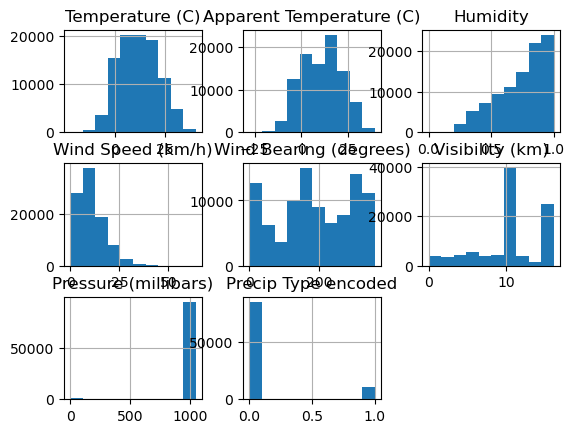

In [21]:
df.hist()

# Machine learning models
### The Best variable to test the Precip type against is the 'Temperature (C)' as it has the highest correlation and a strong normal distribution

Text(0.5, 1.0, 'Visual scatter plot of precip type and Temperature (c)')

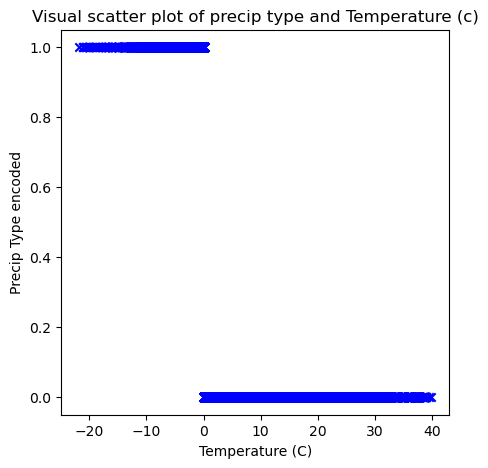

In [22]:
X = df["Temperature (C)"].values
y = df["Precip Type encoded"].values
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X,y, color = "blue", marker = 'x')
plt.xlabel('Temperature (C)')
plt.ylabel('Precip Type encoded')
plt.title('Visual scatter plot of precip type and Temperature (c)')

#### Since plot is non linear, the polynomial models should perform better than the linear models

## 1. Simple Linear regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df["Temperature (C)"].values
y = df["Precip Type encoded"].values

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76748,)
(19188,)
(76748,)
(19188,)


Since the linear regression model requires a 2d array, the variables being inputted into the model have to be reshaped

In [24]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76748, 1)
(19188, 1)
(76748, 1)
(19188, 1)


In [25]:
# create model and fit
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
# predictions
y_pred = lr.predict(x_test)
# coefficeints
lr_coeff = lr.coef_
# intercept
lr_intercept = lr.intercept_
#Mse
lr_mse = mean_squared_error(y_test, y_pred)
#R**2 square
lr_r2 = r2_score(y_test, y_pred)

print(f'coefficients: {lr_intercept}')
print(f'intercept: {lr_intercept}')
print(f'Mean squared error: {lr_mse:.2f}')
print(f'R^2 score: {lr_r2:.2f}')

coefficients: [0.33351534]
intercept: [0.33351534]
Mean squared error: 0.07
R^2 score: 0.32


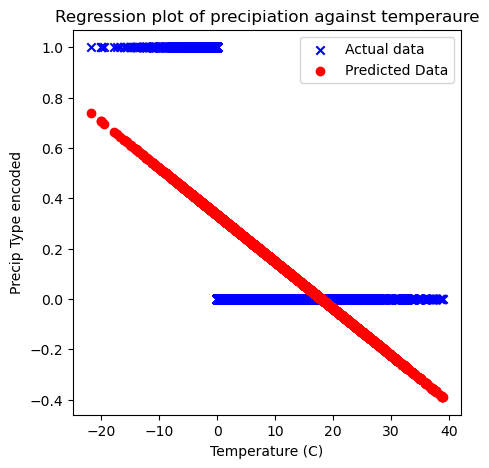

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test,y_test, color = "blue", marker = 'x')
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Temperature (C)')
plt.ylabel('Precip Type encoded')
plt.title('Regression plot of precipiation against temperaure')
plt.legend(['Actual data','Predicted Data'])

## 2. Polynomial regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

#### For polynomial regression, the right number of degrees was needed so K folds and the cross_val_score was used to assess the perfomance at different degrees of polynomials whilst the graph plot allowed a visual check for overfitting

In [29]:
#Prepare data

#degrees to test for best number of polynomial features
degrees = [1, 2, 3, 4, 5]
#K fold for splitting data
kfold = KFold(n_splits=10, shuffle=True, random_state=64)

scores = []

X = df["Temperature (C)"].values
y = df["Precip Type encoded"].values

#Reshape
X = X.reshape(-1,1)
y = y.reshape(-1,1)


In [30]:
#loop over degrees
for degree in degrees:
    # transform the data to a polynomial feature space
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # create the model
    poly_reg = LinearRegression()

    # evaluate the model using cross-validation
    score = cross_val_score( poly_reg, X_poly, y, cv=kfold)

    # store scores
    scores.append(score)

In [31]:
# calculate the mean and standard deviation of the scores
mean_scores = np.mean(scores, axis=1)
std_scores = np.std(scores, axis=1)

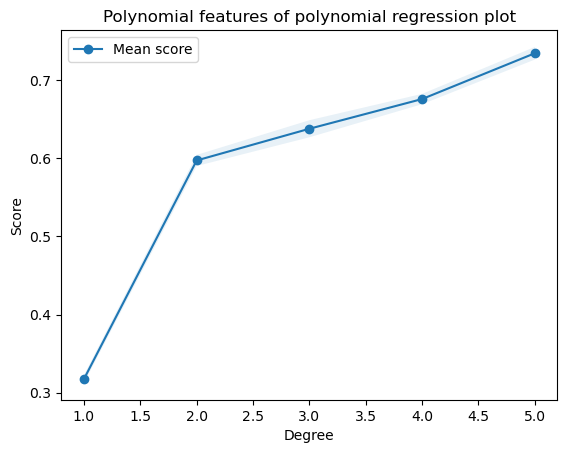

In [32]:
# plot the scores
plt.plot(degrees, mean_scores, 'o-', label='Mean score')
plt.fill_between(degrees, mean_scores - std_scores, mean_scores + std_scores, alpha=0.1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Polynomial features of polynomial regression plot')
plt.legend()


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)

#coeff
poly_reg_coeff = poly_reg.coef_
#intercept
poly_reg_intercept = poly_reg.intercept_
# calculate the mean squared error
mse_poly_reg = mean_squared_error(y_test, y_pred)
# calculate the R**2 score
r2_poly_reg = r2_score(y_test, y_pred)
print(f'coefficients: {poly_reg_coeff}')
print(f'intercept: {poly_reg_intercept}')
print(f'Mean squared error: {mse_poly_reg:.2f}')
print(f'R^2 score: {r2_poly_reg:.2f}')

coefficients: [[ 0.00000000e+00 -9.66505322e-02  3.99035984e-03  1.94670487e-04
  -1.45306394e-05  2.19595718e-07]]
intercept: [0.43541148]
Mean squared error: 0.03
R^2 score: 0.73


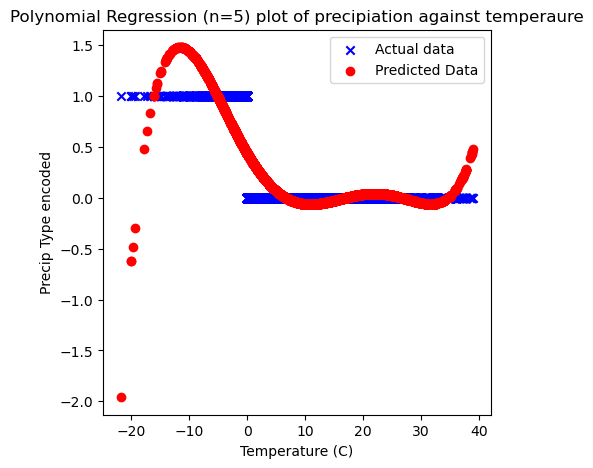

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test,y_test, color = "blue", marker = 'x')
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Temperature (C)')
plt.ylabel('Precip Type encoded')
plt.title('Polynomial Regression (n=5) plot of precipiation against temperaure')
plt.legend(['Actual data','Predicted Data'])

## 3. Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X = df["Temperature (C)"].values
y = df["Precip Type encoded"].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)



lasso = Lasso(alpha=0.1)

#fit
lasso.fit(X_train, y_train)
#predict
y_pred = lasso.predict(X_test)
#coeff
lasso_coeff = lasso.coef_
#intercept
lasso_intercept = lasso.intercept_
#Mean squared error
lasso_mse = mean_squared_error(y_test, y_pred)
#R**2 score
lasso_r2 = r2_score(y_test, y_pred)

print(f'coefficients: {lasso_intercept}')
print(f'intercept: {lasso_intercept}')
print(f'Mean squared error: {lasso_mse:.2f}')
print(f'R^2 score: {lasso_r2:.2f}')

coefficients: [0.3204783]
intercept: [0.3204783]
Mean squared error: 0.07
R^2 score: 0.31


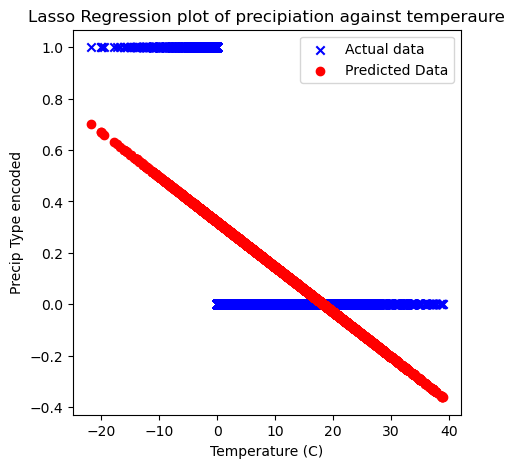

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test,y_test, color = "blue", marker = 'x')
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Temperature (C)')
plt.ylabel('Precip Type encoded')
plt.title('Lasso Regression plot of precipiation against temperaure')
plt.legend(['Actual data','Predicted Data'])

## 4. Polynomial Ridge regression

#### Polynomial Ridge regression was optimised in a similar fashion to the Polynomial regression to get accurate results

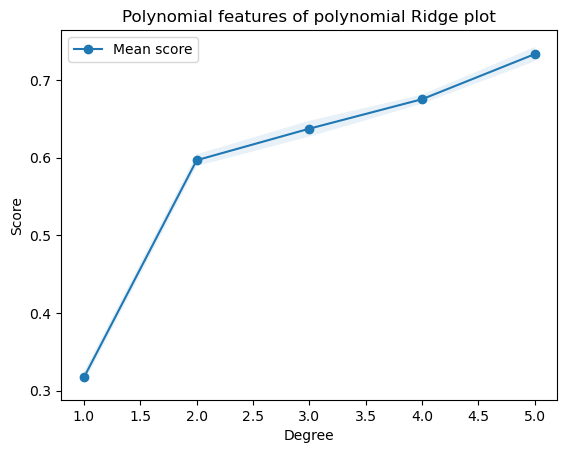

In [38]:
from sklearn.linear_model import Ridge

X = df["Temperature (C)"].values
y = df["Precip Type encoded"].values

#Reshape
X = X.reshape(-1,1)
y = y.reshape(-1,1)


# create a list of degrees to try
degrees = [1, 2, 3, 4, 5]

# create a KFold object with 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# create an empty list to store the scores
scores = []

# loop over the degrees
for degree in degrees:
    # transform the data to a polynomial feature space
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # create the model
    ridge = Ridge(alpha=0.1)

    # evaluate the model using cross-validation
    score = cross_val_score(ridge, X_poly, y, cv=kfold)

    # store the scores
    scores.append(score)

# calculate the mean and standard deviation of the scores
mean_scores = np.mean(scores, axis=1)
std_scores = np.std(scores, axis=1)


# plot the scores
plt.plot(degrees, mean_scores, 'o-', label='Mean score')
plt.fill_between(degrees, mean_scores - std_scores, mean_scores + std_scores, alpha=0.1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Polynomial features of polynomial Ridge plot')
plt.legend()

In [39]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# transform the data to a polynomial feature space
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# create the model
ridge = Ridge(alpha=0.1)

# fit the model to the training data
ridge.fit(X_train_poly, y_train)

# make predictions on the test data
y_pred = ridge.predict(X_test_poly)



#coeff
poly_ridge_coeff = ridge.coef_
#intercept
poly_ridge_intercept = ridge.intercept_
#Mean squared error
poly_ridge_mse = mean_squared_error(y_test, y_pred)
#R**2 score
poly_ridge_r2 = r2_score(y_test, y_pred)

print(f'coefficients: {poly_ridge_intercept}')
print(f'intercept: {poly_ridge_intercept}')
print(f'Mean squared error: {poly_ridge_mse:.2f}')
print(f'R^2 score: {poly_ridge_r2:.2f}')

coefficients: [0.43541144]
intercept: [0.43541144]
Mean squared error: 0.03
R^2 score: 0.73


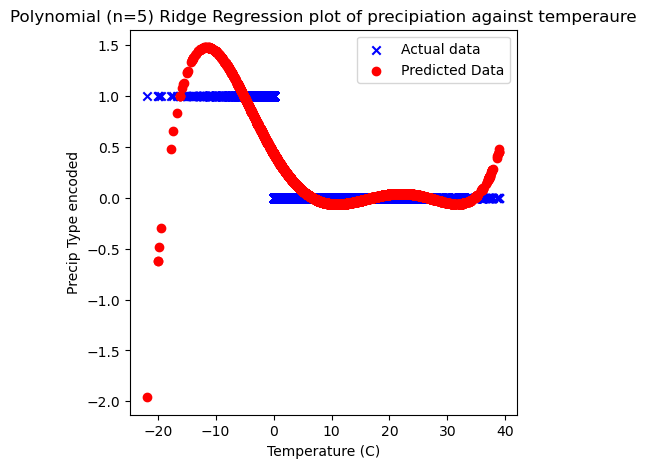

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_test,y_test, color = "blue", marker = 'x')
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Temperature (C)')
plt.ylabel('Precip Type encoded')
plt.title('Polynomial (n=5) Ridge Regression plot of precipiation against temperaure')
plt.legend(['Actual data','Predicted Data'])

In [41]:
mse = [poly_ridge_mse, lasso_mse, mse_poly_reg, lr_mse]
r2 = [poly_ridge_r2, lasso_r2, r2_poly_reg, lr_r2]

labels = ['Poly Ridge', 'Lasso', 'Poly Linear Reg', 'Linear reg']
accuracy_performance = pd.Series(mse, index=labels).to_frame()
accuracy_performance.rename(columns={0: 'RMSE'}, inplace=1)
accuracy_performance['r^2'] = r2
accuracy_performance = accuracy_performance.sort_values(by='r^2', ascending=False)
accuracy_performance

,RMSE,r^2
Poly Ridge,0.026698,0.729237
Poly Linear Reg,0.026698,0.729237
Linear reg,0.067481,0.315633
Lasso,0.067555,0.314880


#### Based on the RMSE and r^2 dataframe, Both the Poly Ridge and the Poly Linear regression models performed considerably better than the Linear and Lasso regression which makes sense as the relationship between the Temperature and the Precipty Type was not strictly linear. For further work, a clustering system can be used on the model to get better results but that goes beyond the scope of testing using regression.